In [18]:
import requests
import pandas as pd


def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'],unit='s')
    df.set_index('CloseTime', inplace =True)
    return df
    


In [19]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-10-16 05:56:29.280106')

In [20]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [21]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-16 06:00:00,11272.94,11368.94,11272.94,11349.09,193.796743,2.196508e+06
2020-10-16 07:00:00,11349.00,11365.64,11316.20,11339.75,96.309935,1.091855e+06
2020-10-16 08:00:00,11330.91,11348.44,11313.60,11317.39,162.186095,1.837514e+06
2020-10-16 09:00:00,11317.16,11350.00,11305.68,11310.30,125.367944,1.419631e+06
2020-10-16 10:00:00,11307.83,11307.83,11219.61,11254.91,307.155635,3.459294e+06


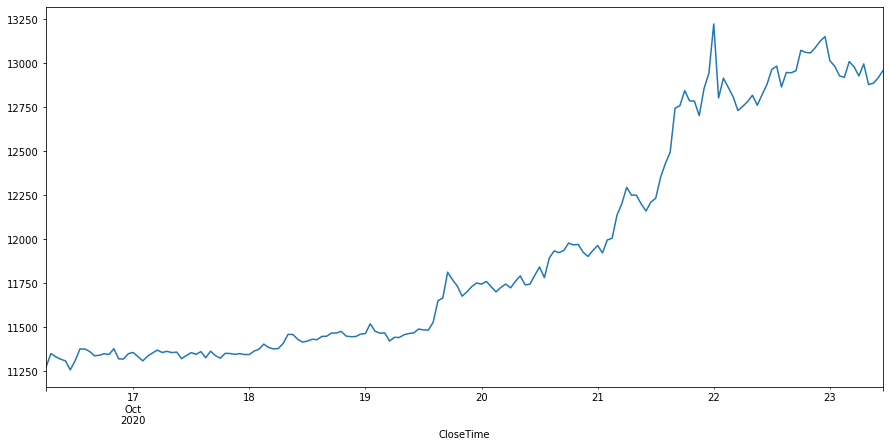

In [22]:
btc['OpenPrice'].plot(figsize=(15,7))

In [23]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [24]:
output_notebook()

Loading BokehJS ...

In [25]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')

p1.legend.location = "top_left"

show(p1)

In [26]:
btc.plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7fcbe0b71be0>>